In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [2]:
file_path = "/content/drive/MyDrive/dataset/Data_s_E5 (1)"
with open(file_path, "rb") as file:
  data = pickle.load(file)
data.head()

,reviewerID,asin,reviewText,overall,feature,original_reviewText
0,A2EKIE8ATFNAWU,0005019281,i saw this for the first time in the s and lik...,5.0,"[[[106, 108, 109], [137, 139, 140], [152, 154,...",I saw this for the first time in the 80s and l...
1,A1I8PLHXCCP1AG,0005119367,this is a fantast movi or the retel of the sto...,5.0,"[[[0, 19, 45], [8, 38, 63], [23, 59, 82], [40,...",This is a fantastic movie or the retelling of ...
2,A2TWPL984OQ5DN,0307514161,what s all this complain about destini s child...,1.0,"[[[23, 36, 43], [42, 69, 76], [53, 102, 109], ...",What's all this complaining about Destiny's Ch...
3,A3RHFIMN42TM03,0307514161,ive watch this everi year sinc i was young it ...,5.0,"[[[23, 36, 43], [42, 69, 76], [53, 102, 109], ...","Ive watched this every year since I was young,..."
4,A3A48XEYWLWH7T,0307514161,my wife return from some christma shop w the r...,5.0,"[[[23, 36, 43], [42, 69, 76], [53, 102, 109], ...",My wife returned from some Christmas shopping ...


In [3]:
random_subset = data.sample(n=500, random_state=42)

# Display the first few rows of the random subset
random_subset.head()
random_subset.shape

(500, 6)

In [4]:
feature_data = random_subset['feature']
review_data = random_subset['reviewText']
rating_data = random_subset['overall']

In [5]:
# building lstm model
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
Xt = random_subset['reviewText']
yt = random_subset['overall']

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(Xt)
X_sequences = tokenizer.texts_to_sequences(Xt)

# Pad sequences to a fixed length (adjust maxlen as needed)
maxlen = 100
X_padded = pad_sequences(X_sequences, maxlen=maxlen)


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_padded, yt, test_size=0.2, random_state=42)

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_1, y_train_1, epochs=100, batch_size=32, validation_split=0.2)

loss = model_lstm.evaluate(X_test_1, y_test_1)
print(f"Test loss: {loss}")

new_text = ["Example review text"]  # Replace with your text data
new_text_sequences = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_sequences, maxlen=maxlen)

predicted_rating = model_lstm.predict(new_text_padded)
print(f"Predicted rating: {predicted_rating[0][0]}")


Epoch 1/100
10/10 [==============================] - 9s 182ms/step - loss: 16.2570 - val_loss: 12.5098
Epoch 2/100
10/10 [==============================] - 1s 94ms/step - loss: 4.7357 - val_loss: 1.2530
Epoch 3/100
10/10 [==============================] - 1s 103ms/step - loss: 1.4016 - val_loss: 1.1489
Epoch 4/100
10/10 [==============================] - 1s 91ms/step - loss: 1.2429 - val_loss: 1.1920
Epoch 5/100
10/10 [==============================] - 1s 114ms/step - loss: 1.2307 - val_loss: 1.1506
Epoch 6/100
10/10 [==============================] - 1s 131ms/step - loss: 1.2064 - val_loss: 1.1466
Epoch 7/100
10/10 [==============================] - 1s 130ms/step - loss: 1.1638 - val_loss: 1.1582
Epoch 8/100
10/10 [==============================] - 1s 98ms/step - loss: 1.1079 - val_loss: 1.1434
Epoch 9/100
10/10 [==============================] - 1s 107ms/step - loss: 1.0356 - val_loss: 1.1396
Epoch 10/100
10/10 [==============================] - 1s 98ms/step - loss: 0.9473 - val_loss

In [6]:
# building the cnn model
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

Xf = random_subset['feature']
yf = random_subset['overall']

Xf = [np.concatenate(x) for x in Xf]

# Convert features and target to numpy arrays
Xf = np.array(Xf)
yf = np.array(yf)

Xf = Xf.reshape(Xf.shape[0], 224, 224, 3)



X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(Xf, yf, test_size=0.2, random_state=42)
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

model_cnn.compile(loss='mean_squared_error', optimizer='adam')
model_cnn.fit(X_train_2, y_train_2, epochs=100, batch_size=32, validation_split=0.2)

loss = model_cnn.evaluate(X_test_2, y_test_2)
print(f"Test loss: {loss}")

predicted_ratings = model_cnn.predict(X_test_2)
print(f"Predicted rating: {predicted_rating[0][0]}")

Epoch 1/100
10/10 [==============================] - 8s 90ms/step - loss: 1724959.6250 - val_loss: 139.2394
Epoch 2/100
10/10 [==============================] - 0s 49ms/step - loss: 28.7754 - val_loss: 4.6924
Epoch 3/100
10/10 [==============================] - 0s 48ms/step - loss: 3.6167 - val_loss: 2.3407
Epoch 4/100
10/10 [==============================] - 0s 49ms/step - loss: 2.2080 - val_loss: 2.3691
Epoch 5/100
10/10 [==============================] - 1s 52ms/step - loss: 2.2856 - val_loss: 2.5100
Epoch 6/100
10/10 [==============================] - 1s 51ms/step - loss: 2.1270 - val_loss: 2.1955
Epoch 7/100
10/10 [==============================] - 0s 48ms/step - loss: 1.8578 - val_loss: 1.9798
Epoch 8/100
10/10 [==============================] - 0s 51ms/step - loss: 1.7310 - val_loss: 1.8538
Epoch 9/100
10/10 [==============================] - 1s 54ms/step - loss: 1.5513 - val_loss: 1.8020
Epoch 10/100
10/10 [==============================] - 0s 50ms/step - loss: 1.3937 - val_los

[0]	validation_0-rmse:1.39859
[1]	validation_0-rmse:1.47706
[2]	validation_0-rmse:1.53464
[3]	validation_0-rmse:1.58984
[4]	validation_0-rmse:1.62217
[5]	validation_0-rmse:1.64786
[6]	validation_0-rmse:1.69104
[7]	validation_0-rmse:1.69845
[8]	validation_0-rmse:1.71298
[9]	validation_0-rmse:1.72372
[10]	validation_0-rmse:1.73139
[11]	validation_0-rmse:1.74405
[12]	validation_0-rmse:1.74679
[13]	validation_0-rmse:1.75449
[14]	validation_0-rmse:1.74642
[15]	validation_0-rmse:1.74225
[16]	validation_0-rmse:1.73965
[17]	validation_0-rmse:1.74240
[18]	validation_0-rmse:1.73927
[19]	validation_0-rmse:1.74333
[20]	validation_0-rmse:1.74296
[21]	validation_0-rmse:1.74464
[22]	validation_0-rmse:1.75156
[23]	validation_0-rmse:1.75521
[24]	validation_0-rmse:1.75696
[25]	validation_0-rmse:1.75743
[26]	validation_0-rmse:1.75867
[27]	validation_0-rmse:1.76255
[28]	validation_0-rmse:1.76446
[29]	validation_0-rmse:1.76554
[30]	validation_0-rmse:1.76641
[31]	validation_0-rmse:1.76952
[32]	validation_0-

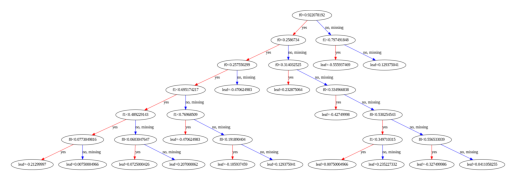

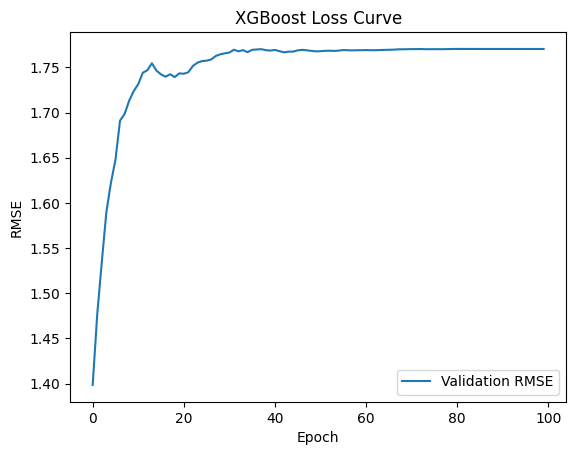

XGBoost Model MSE: 3.1341615999591577


In [10]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have the predictions from the CNN and LSTM models
cnn_predictions = np.random.rand(100)  # Replace with actual CNN predictions
lstm_predictions = np.random.rand(100)  # Replace with actual LSTM predictions

# Combine the predictions as features
X_combined = np.column_stack((cnn_predictions, lstm_predictions))


# Split the data into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_test_1, test_size=0.2, random_state=42)

# Create and train an XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
xgb_model.fit(
    X_train_combined, y_train_combined,
    eval_set=[(X_test_combined, y_test_combined)],
    verbose=True  # Print progress
)

tree_index = 0

# Plot the specified tree
xgb.plot_tree(xgb_model, num_trees=tree_index)
plt.savefig("/content/drive/MyDrive/Image Classification/xgboost_tree.png")  # You can specify the desired file format
# Display the tree using plt.show() (optional)






plt.show()
# Extract and plot the loss curve
results = xgb_model.evals_result()
train_rmse = results["validation_0"]["rmse"]
plt.plot(train_rmse, label="Validation RMSE")
plt.title("XGBoost Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# Make predictions using the XGBoost model
xgb_predictions = xgb_model.predict(X_test_combined)

# Evaluate the performance of the XGBoost model using MSE
xgb_mse = mean_squared_error(y_test_combined, xgb_predictions)
print(f"XGBoost Model MSE: {xgb_mse}")
